#Week3 探索データ分析

##●アヤメのデータ分析


###【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

In [1]:
import numpy as np
np.set_printoptions(threshold=100)   #print表示での配列の省略：有り（閾値=100）
#np.set_printoptions(threshold=np.inf)   #print表示での配列の省略：無し

from sklearn.datasets import load_iris
iris = load_iris()
'''
print("iris.feature_names: {}".format(iris.feature_names))
print("iris.data:\n{}".format(iris.data))
print("iris.data.shape: {}".format(iris.data.shape))
print("iris.target_names: {}".format(iris.target_names))
print("iris.target:\n{}".format(iris.target))
print("iris.target.shape: {}".format(iris.target.shape))
'''
print("iris.target_names: {}".format(iris.target_names))
import pandas as pd
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("X:\n{}".format(X))

y = pd.DataFrame(data=iris.target, columns=["species"])
print("y:\n{}".format(y))

iris.target_names: ['setosa' 'versicolor' 'virginica']
X:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 

###【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [2]:
pd.set_option('display.max_rows', 150)    #最大表示行数を150にセット
pd.set_option('display.max_columns', 5)   #最大表示列数を5にセット

df = pd.concat([X, y], axis=1)
print("df:\n{}".format(df))

df:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8  

###【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

In [3]:
pd.set_option('display.max_rows', 10)    #最大表示行数を10にセット
pd.set_option('display.max_columns', 5)   #最大表示列数を5にセット

print("df.head():\n{}".format(df.head()))
print("\n")
print("df.info():\n{}".format(df.info()))
print("\n")
print("df.describe():\n{}".format(df.describe()))
print("\n")
print("df.isnull():\n{}".format(df.isnull()))
print("\n")
print("df.sum():\n{}".format(df.sum()))

ser = pd.Series(iris.target)
print("\n")
print("ser.value_counts():\n{}".format(ser.value_counts()))


df.head():
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    in

###【問題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

####【問題4 解答】
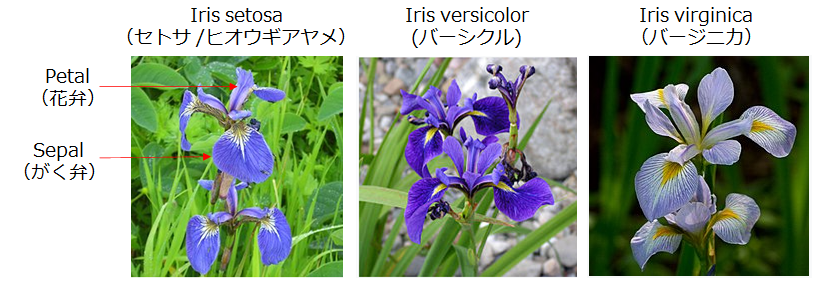


※上記の写真はWikipediaより引用。

###【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


- sepal_widthの列を３つの異なる方法で抽出する
- 50番目から99番目までのデータを抽出する
- petal_lengthの列の50番目から99番目までのデータを抽出する
- petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

####【問題5 解答】
■df.locメソッドとdf.iloc[]メソッドの違いについて
- df.loc[]<br>
      行名と列名を指定してデータを抽出する
- df.iloc[]<br>
      行番号と列番号を指定してデータを抽出する

In [4]:
pd.set_option('display.max_rows', 10)    #最大表示行数を10にセット
pd.set_option('display.max_columns', 5)   #最大表示列数を5にセット

print("■sepal_widthの列を３つの異なる方法で抽出する")
print(" - 方法1: df[\"sepal width (cm)\"]")
print(df["sepal width (cm)"])
print("\n")
print(" - 方法2: df.loc[:, \"sepal width (cm)\"]")
print(df.loc[:, "sepal width (cm)"])
print("\n")
print(" - 方法3: df.iloc[:, 1]")
print(df.iloc[:, 1])

print("\n")
print("■50番目から99番目までのデータを抽出する")
print(df.iloc[50:100, :])

print("\n")
print("■petal_lengthの列の50番目から99番目までのデータを抽出する")
print(df.loc[50:99, "petal length (cm)"])

print("\n")
print("■petal_widthの値が0.2のデータを抽出する")
print(df[df.loc[:, "petal width (cm)"] == 0.2])
print("petal_widthが0.2であるデータの件数:\n{}".format(df[df.loc[:, "petal width (cm)"] == 0.2].count()))


■sepal_widthの列を３つの異なる方法で抽出する
 - 方法1: df["sepal width (cm)"]
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


 - 方法2: df.loc[:, "sepal width (cm)"]
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


 - 方法3: df.iloc[:, 1]
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64


■50番目から99番目までのデータを抽出する
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53          

###【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

####【問題6 解答】
■箱ひげ図とバイオリン図の違いについて
- 箱ひげ図
      外れ値や四分位数を表示可能。
- バイオリン図
      データの分布が滑らかに表示されるので、分布のイメージが掴みやすい。

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fca9a5cffd0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fca9a5da410>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fca9a5c38d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fca9a5da750>}

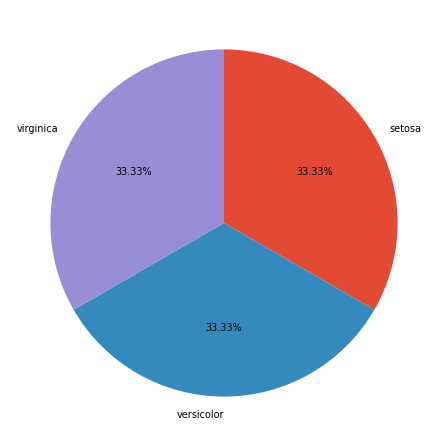

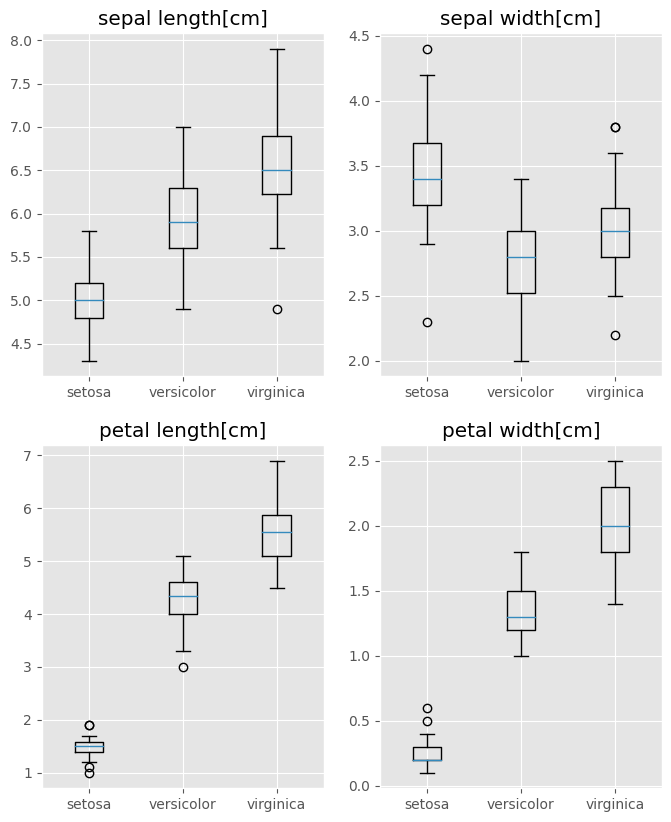

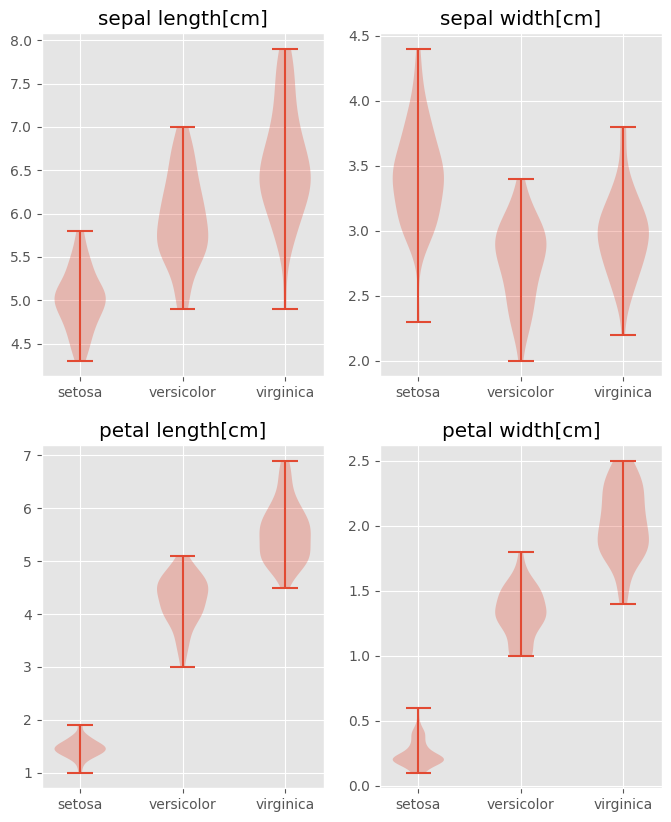

In [5]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

#iris.target_names: ['setosa' 'versicolor' 'virginica']

#各ラベルの割合の円グラフを描画
fig1, ax1 = plt.subplots(figsize=(8, 10), dpi=70)
ax1.pie(ser.value_counts(), labels=iris.target_names, startangle=90, counterclock=False, autopct="%1.2f%%")

#各説明変数の箱ひげ図をラベル毎に描画
fig2, ax2 = plt.subplots(2, 2, figsize=(8, 10), dpi=100)
ax2[0][0].set_title("sepal length[cm]")
ax2[0][1].set_title("sepal width[cm]")
ax2[1][0].set_title("petal length[cm]")
ax2[1][1].set_title("petal width[cm]")
sepal_length_list = [df[df.loc[:, "species"]== 0].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"]]
sepal_width_list = [df[df.loc[:, "species"]== 0].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal width (cm)"]]
petal_length_list = [df[df.loc[:, "species"]== 0].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"]]
petal_width_list = [df[df.loc[:, "species"]== 0].loc[:, "petal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal width (cm)"]]
ax2[0][0].boxplot(sepal_length_list, labels=iris.target_names)
ax2[0][1].boxplot(sepal_width_list, labels=iris.target_names)
ax2[1][0].boxplot(petal_length_list, labels=iris.target_names)
ax2[1][1].boxplot(petal_width_list, labels=iris.target_names)

#各説明変数のバイオリン図をラベル毎に描画
fig3, ax3 = plt.subplots(2, 2, figsize=(8, 10), dpi=100)
ax3[0][0].set_title("sepal length[cm]")
ax3[0][1].set_title("sepal width[cm]")
ax3[1][0].set_title("petal length[cm]")
ax3[1][1].set_title("petal width[cm]")
sepal_length_list = [df[df.loc[:, "species"]== 0].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"]]
sepal_width_list = [df[df.loc[:, "species"]== 0].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal width (cm)"]]
petal_length_list = [df[df.loc[:, "species"]== 0].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"]]
petal_width_list = [df[df.loc[:, "species"]== 0].loc[:, "petal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal width (cm)"]]
ax3[0][0].set_xticks([1, 2, 3])
ax3[0][1].set_xticks([1, 2, 3])
ax3[1][0].set_xticks([1, 2, 3])
ax3[1][1].set_xticks([1, 2, 3])
ax3[0][0].set_xticklabels(iris.target_names)
ax3[0][1].set_xticklabels(iris.target_names)
ax3[1][0].set_xticklabels(iris.target_names)
ax3[1][1].set_xticklabels(iris.target_names)
ax3[0][0].violinplot(sepal_length_list)
ax3[0][1].violinplot(sepal_width_list)
ax3[1][0].violinplot(petal_length_list)
ax3[1][1].violinplot(petal_width_list)

###【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


- ４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。
- 特徴量すべてを組み合わせを一度に表示させた、散布図行列を作る。
- ４つの特徴量に関する相関係数行列を作る
相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。
- 相関係数行列のヒートマップを作る(１つ)

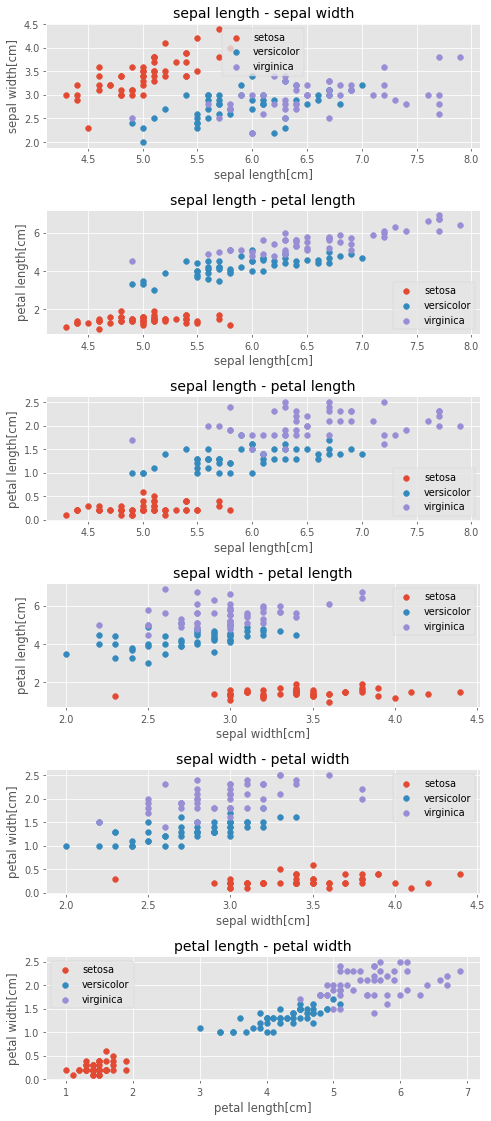

In [6]:
#４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。

fig4, ax4 = plt.subplots(6, figsize=(8, 20), dpi=70)
fig4.subplots_adjust(wspace=0.1, hspace=0.5)    #グラフ同士の間隔を指定

#sepal length - sepal width
ax4[0].set_title("sepal length - sepal width")
ax4[0].set_xlabel("sepal length[cm]")
ax4[0].set_ylabel("sepal width[cm]")
ax4[0].scatter(df[df.loc[:, "species"]== 0].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 0].loc[:, "sepal width (cm)"], label=iris.target_names[0])
ax4[0].scatter(df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "sepal width (cm)"], label=iris.target_names[1])
ax4[0].scatter(df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "sepal width (cm)"], label=iris.target_names[2])
ax4[0].legend(loc='best') # 凡例を表示

#sepal length - petal length
ax4[1].set_title("sepal length - petal length")
ax4[1].set_xlabel("sepal length[cm]")
ax4[1].set_ylabel("petal length[cm]")
ax4[1].scatter(df[df.loc[:, "species"]== 0].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 0].loc[:, "petal length (cm)"], label=iris.target_names[0])
ax4[1].scatter(df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], label=iris.target_names[1])
ax4[1].scatter(df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"], label=iris.target_names[2])
ax4[1].legend(loc='best') # 凡例を表示

#sepal length - petal width
ax4[2].set_title("sepal length - petal length")
ax4[2].set_xlabel("sepal length[cm]")
ax4[2].set_ylabel("petal length[cm]")
ax4[2].scatter(df[df.loc[:, "species"]== 0].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 0].loc[:, "petal width (cm)"], label=iris.target_names[0])
ax4[2].scatter(df[df.loc[:, "species"]== 1].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal width (cm)"], label=iris.target_names[1])
ax4[2].scatter(df[df.loc[:, "species"]== 2].loc[:, "sepal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal width (cm)"], label=iris.target_names[2])
ax4[2].legend(loc='best') # 凡例を表示

#sepal width - petal length
ax4[3].set_title("sepal width - petal length")
ax4[3].set_xlabel("sepal width[cm]")
ax4[3].set_ylabel("petal length[cm]")
ax4[3].scatter(df[df.loc[:, "species"]== 0].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 0].loc[:, "petal length (cm)"], label=iris.target_names[0])
ax4[3].scatter(df[df.loc[:, "species"]== 1].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], label=iris.target_names[1])
ax4[3].scatter(df[df.loc[:, "species"]== 2].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"], label=iris.target_names[2])
ax4[3].legend(loc='best') # 凡例を表示

#sepal width - petal width
ax4[4].set_title("sepal width - petal width")
ax4[4].set_xlabel("sepal width[cm]")
ax4[4].set_ylabel("petal width[cm]")
ax4[4].scatter(df[df.loc[:, "species"]== 0].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 0].loc[:, "petal width (cm)"], label=iris.target_names[0])
ax4[4].scatter(df[df.loc[:, "species"]== 1].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal width (cm)"], label=iris.target_names[1])
ax4[4].scatter(df[df.loc[:, "species"]== 2].loc[:, "sepal width (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal width (cm)"], label=iris.target_names[2])
ax4[4].legend(loc='best') # 凡例を表示

#petal length - petal width
ax4[5].set_title("petal length - petal width")
ax4[5].set_xlabel("petal length[cm]")
ax4[5].set_ylabel("petal width[cm]")
ax4[5].scatter(df[df.loc[:, "species"]== 0].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 0].loc[:, "petal width (cm)"], label=iris.target_names[0])
ax4[5].scatter(df[df.loc[:, "species"]== 1].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 1].loc[:, "petal width (cm)"], label=iris.target_names[1])
ax4[5].scatter(df[df.loc[:, "species"]== 2].loc[:, "petal length (cm)"], df[df.loc[:, "species"]== 2].loc[:, "petal width (cm)"], label=iris.target_names[2])
ax4[5].legend(loc='best') # 凡例を表示
plt.show()

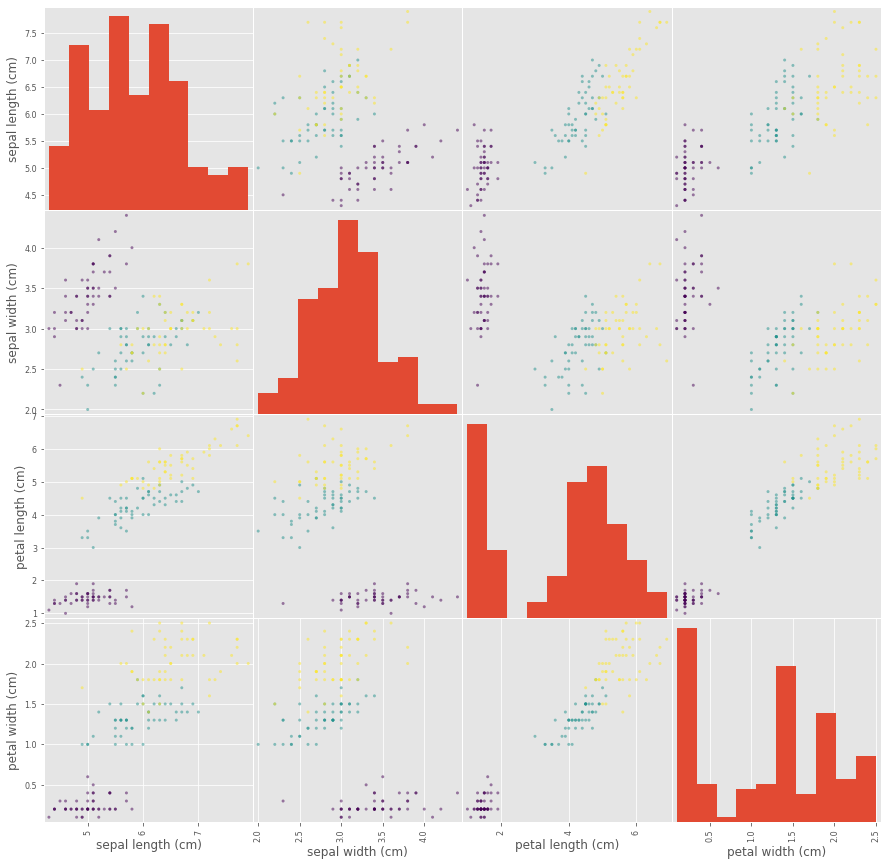

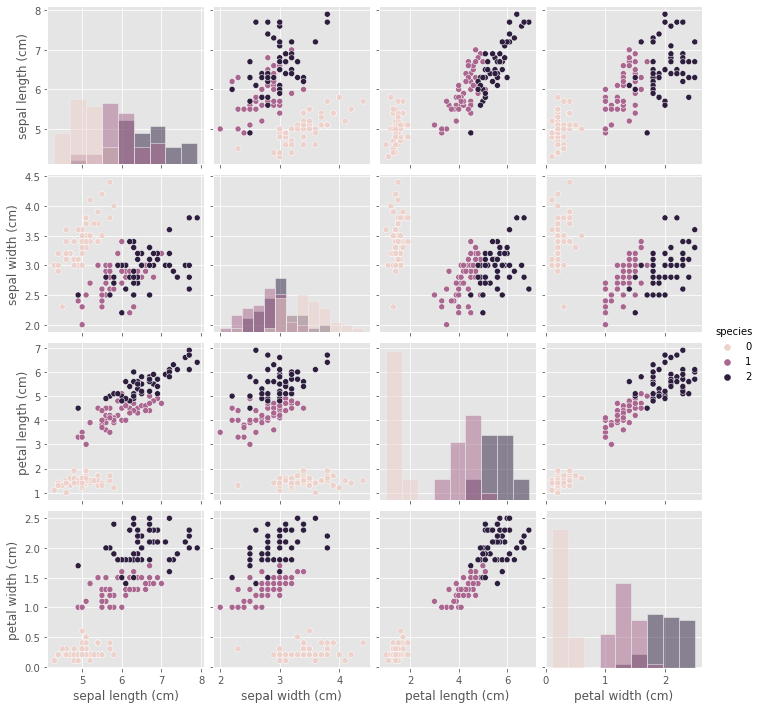

In [7]:
#特徴量すべてを組み合わせを一度に表示させた、散布図行列を作る。

#Pandasを用いた例
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:, 0:4], figsize=(15, 15), c=iris.target)

#Seabornを用いた例
import seaborn as sns
sns.pairplot(df, hue="species", diag_kind="hist")

In [8]:
#４つの特徴量に関する相関係数行列を作る 相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

corr_matrix = df.iloc[:, 0:4].corr()
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


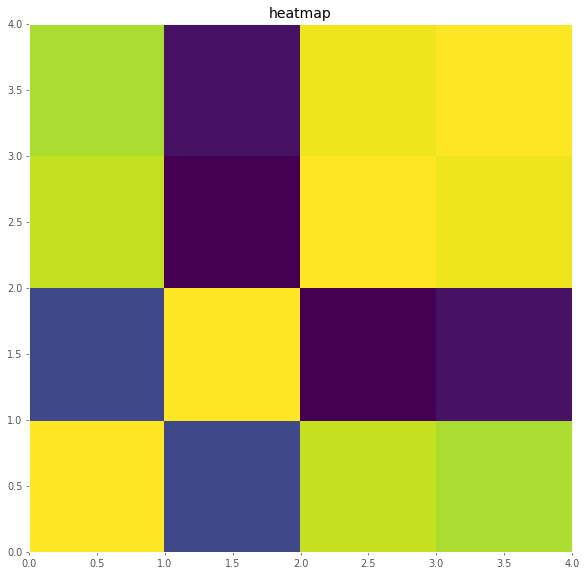

In [9]:
#相関係数行列のヒートマップを作る(１つ)

fig5, ax5 = plt.subplots(figsize=(10, 10), dpi=70)

ax5.set_title("heatmap")
ax5.pcolor(corr_matrix)
plt.show()

###【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。

####【問題8 解答】
- がく弁(sepal)と花弁(petal)の大きさの相関関係
      versicolorとvirginicaについては正の相関があるが、setosaについては大きな相関はみられなかった。
- がく弁（または花弁）の、長さと幅の相関関係
      3種類のアヤメいずれについても、長さと幅には正の相関がみられた。
- 3種類のアヤメのサイズの順列
      ほとんどの特徴量について「setosa < versicolor < virginica」の関係がみられたが、がく弁の幅（sepal width）のみについては「setosa > versicolor ≒ virginica」となった。